In [1]:
# importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("mcdonalds.csv")
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [5]:
df.shape

(1453, 15)

In [6]:
df.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [7]:
# calculating count of variables
df['Gender'].value_counts()

Female    788
Male      665
Name: Gender, dtype: int64

In [8]:
df['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [9]:
df['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
I hate it!-5    152
+1              152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

# Exploring Data

In [10]:
# Customer Segmentation based on Age and Gender(Sociodemographic Segmentation)

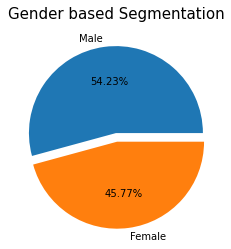

In [11]:
# Gender based Segmentation

label = ['Male', 'Female']
size = df['Gender'].value_counts()
explode = [0,0.1]

plt.pie(size,labels=label,explode = explode,autopct='%.2f%%')
plt.title('Gender based Segmentation', fontsize =15)
plt.show()



Text(0.5, 1.0, 'Age based segmentation')

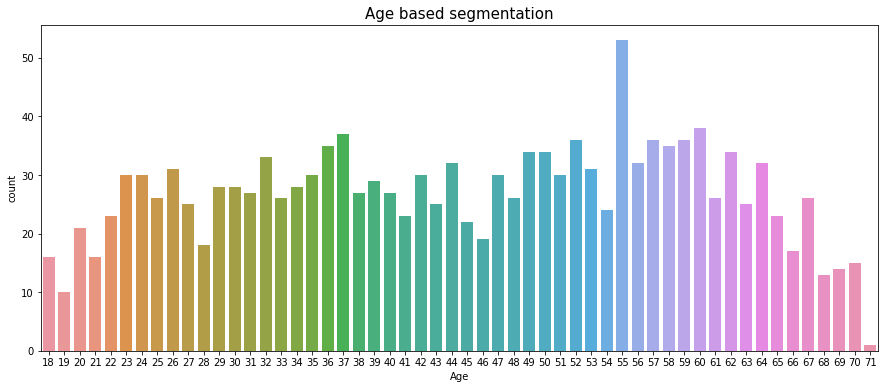

In [12]:
# Age based Segmentation
plt.figure(figsize=(15,6))
a = sns.countplot(x = df['Age'])
plt.title('Age based segmentation', fontsize=15)

In [13]:
#Customer segmentation based on pyschographic segmentation

Text(0.5, 1.0, 'Liking of McDonalds')

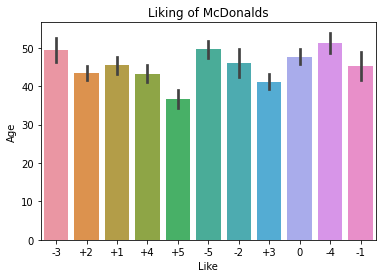

In [14]:
#replacing text in Like column with numbered values for convience
df['Like'] = df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})

sns.barplot(x='Like', y='Age', data=df)
plt.title('Liking of McDonalds')

In [15]:
# performing Label Encoding for categorical columns from 1 to 11
from sklearn.preprocessing import LabelEncoder

In [16]:
df_cat = df.iloc[:,0:11]
df_cat

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No


In [25]:
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

df_cat = df.iloc[:,0:11]
for i in df_cat:
    labelling(i)
    
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


array([[<AxesSubplot:title={'center':'yummy'}>,
        <AxesSubplot:title={'center':'convenient'}>,
        <AxesSubplot:title={'center':'spicy'}>],
       [<AxesSubplot:title={'center':'fattening'}>,
        <AxesSubplot:title={'center':'greasy'}>,
        <AxesSubplot:title={'center':'fast'}>],
       [<AxesSubplot:title={'center':'cheap'}>,
        <AxesSubplot:title={'center':'tasty'}>,
        <AxesSubplot:title={'center':'expensive'}>],
       [<AxesSubplot:title={'center':'healthy'}>,
        <AxesSubplot:title={'center':'disgusting'}>,
        <AxesSubplot:title={'center':'Age'}>]], dtype=object)

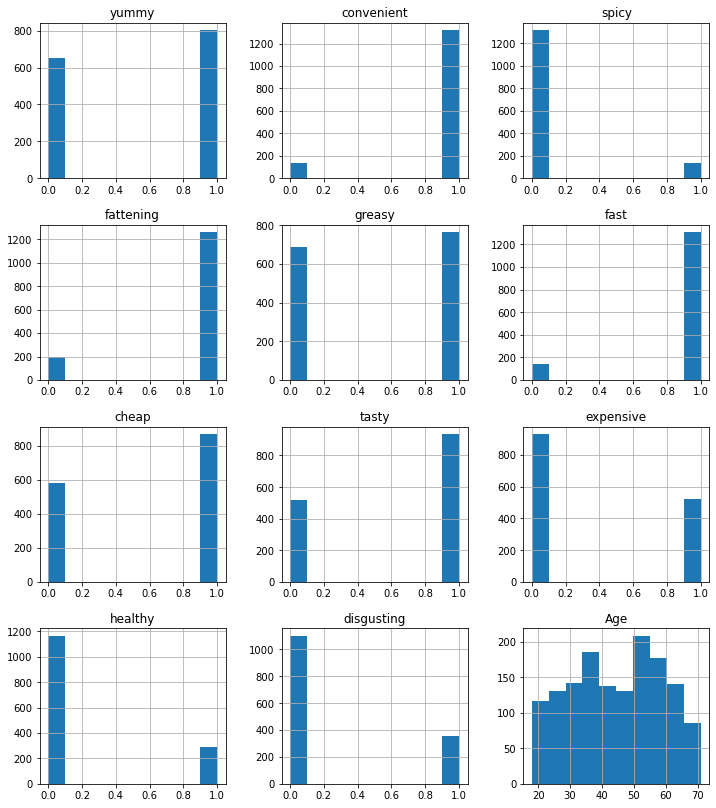

In [18]:
plt.rcParams['figure.figsize'] = (12,14)
df.hist()

In [26]:
# converting 11 categorical columns into array
x = df_cat.values
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [27]:
# calculating mean of 11 columns
round(df.iloc[:,0:11].mean(),2)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

# Principal Component Analysis

In [28]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [29]:
pca_data = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
print(pc)

[[ 0.42536706 -0.21907878  0.6632553  ...  0.18100693  0.51570617
  -0.56707389]
 [-0.21863768  0.38818996 -0.73082668 ...  0.11147641  0.49331285
  -0.50044033]
 [ 0.37541475  0.73043507 -0.12203978 ... -0.32228786  0.06175857
   0.24274108]
 ...
 [-0.18589445  1.06266156  0.22085675 ...  0.03825472  0.05651822
  -0.01279977]
 [-1.18206441 -0.03856977  0.56156066 ...  0.02226748 -0.00257265
  -0.10531631]
 [ 1.55024186  0.27503101 -0.01373727 ... -0.13658866 -0.43279782
  -0.45607556]]


In [30]:
# Inserting pc into a dataFrame
colnames = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11']
df_pc = pd.DataFrame(data = pc, columns=colnames)
df_pc.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245


In [31]:
df_pc.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
count,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03
mean,-1.665717e-17,-3.075463e-17,3.944019e-17,3.247383e-18,5.845290e-17,1.039163e-17,5.491898e-18,2.597907e-17,-1.241647e-17,6.846248e-17,1.226365e-17
std,7.570495e-01,6.074556e-01,5.046195e-01,3.987986e-01,3.374050e-01,3.102746e-01,2.896973e-01,2.751220e-01,2.652511e-01,2.488418e-01,2.369028e-01
min,-1.188421e+00,-1.040274e+00,-8.808133e-01,-5.906209e-01,-1.045938e+00,-8.524911e-01,-8.059463e-01,-9.316201e-01,-9.557606e-01,-8.871971e-01,-8.851439e-01
25%,-5.476794e-01,-3.568482e-01,-4.507793e-01,-2.814986e-01,-2.433247e-01,-1.927027e-01,-1.342190e-01,-1.717258e-01,-1.181233e-01,-1.465751e-01,-1.053163e-01
50%,-7.074592e-02,-1.151632e-01,2.687734e-02,-1.163200e-01,3.348785e-02,-3.460184e-02,-6.366220e-02,-3.475619e-02,3.868061e-02,3.020635e-02,-1.201409e-02
75%,4.933012e-01,3.915540e-01,3.515939e-01,2.702298e-01,2.048293e-01,1.747453e-01,2.318357e-02,1.295966e-01,7.987794e-02,7.001416e-02,8.554080e-02
max,1.705573e+00,1.279130e+00,1.326976e+00,1.355278e+00,1.053327e+00,1.323793e+00,1.350886e+00,1.121388e+00,1.086693e+00,1.181524e+00,9.255829e-01


In [32]:
pca_variance = pca.explained_variance_ratio_
pca_variance

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [33]:
np.cumsum(pca_variance)

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [34]:
! pip install bioinfokit

In [35]:
from bioinfokit.visuz import cluster

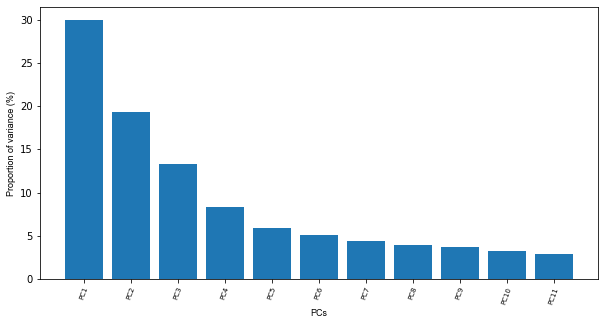

In [36]:
#Scree plot (Elbow test)- PCA
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))

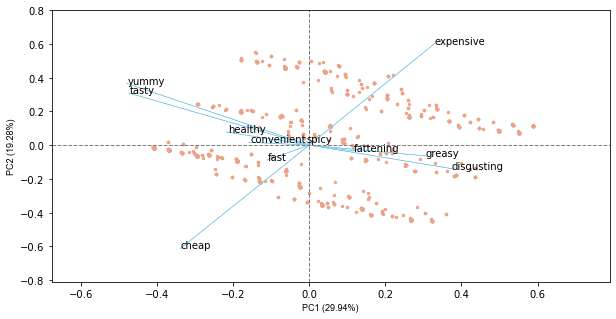

In [37]:
# get PC scores
pca_scores = PCA().fit_transform(x)

# get 2D biplot

cluster.biplot(cscore=pca_scores, loadings=pca.components_, labels=df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

# Extracting Segments

In [38]:
# K-means
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_cat)
df['cluster_num'] = kmeans.labels_#adding to df
print ('Labels to input data :', kmeans.labels_) #Label assigned for each data point
print ('kMeans Inertia :',kmeans.inertia_) #gives within-cluster sum of squares. 
print('No. of iterations :', kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print('Centriods Location:\n', kmeans.cluster_centers_) #Location of the centroids on each cluster. 

Labels to input data : [2 0 0 ... 0 1 3]
kMeans Inertia : 1603.0604440558945
No. of iterations : 7
Centriods Location:
 [[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]


In [39]:
df['cluster_num'].value_counts()

1    580
0    323
2    304
3    246
Name: cluster_num, dtype: int64

In [40]:
#To see each cluster size
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 304, 0: 323, 1: 580, 3: 246})

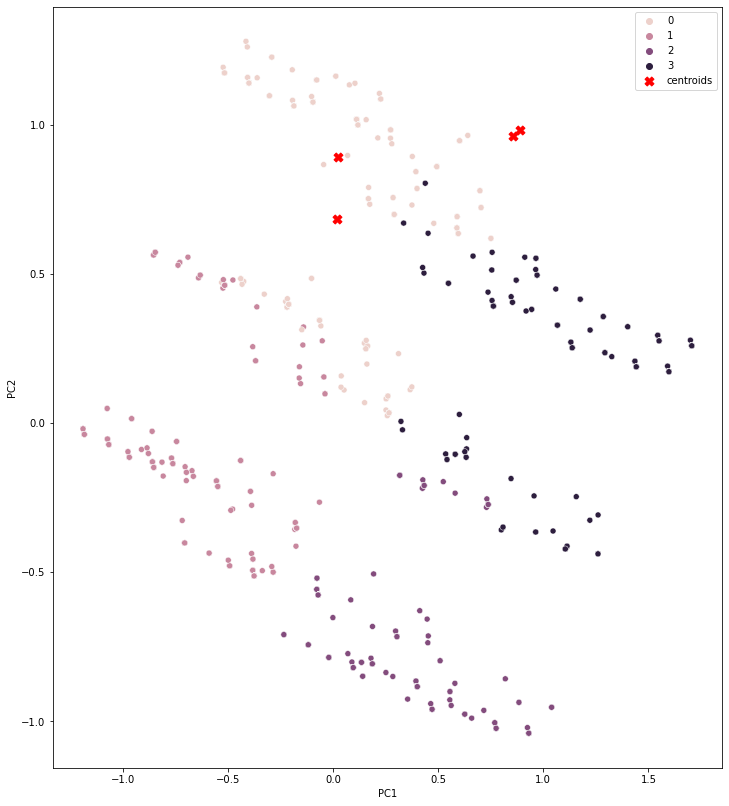

In [41]:
#Visulazing clusters
sns.scatterplot(data=df_pc, x="PC1", y="PC2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [42]:
# Hierarchical Clustering Algotithm

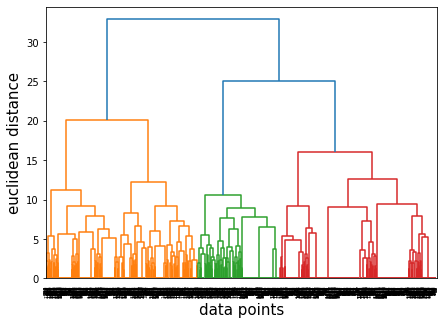

In [43]:
#create demogram and find the best clustering value
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(df_cat, method='ward')
plt.rcParams['figure.figsize'] = (7,5)
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points", fontsize = 15)
plt.ylabel("euclidean distance", fontsize=15)
plt.show()

# DESCRIBING SEGMENTS

In [44]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(df['cluster_num'],df['Like'])
#Reordering cols
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab 

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,5,3,7,6,7,36,42,60,66,47,44
1,4,4,2,6,13,43,65,90,143,111,99
2,54,36,34,28,25,51,31,31,12,2,0
3,89,28,30,19,13,39,14,6,8,0,0


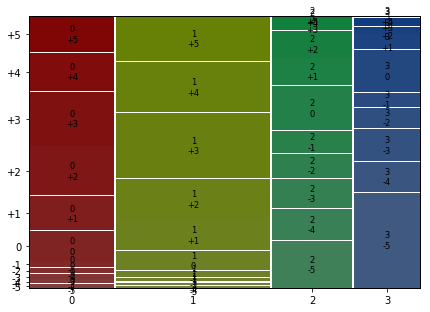

In [45]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

In [46]:
#Mosaic plot gender vs segment
crosstab_gender =pd.crosstab(df['cluster_num'],df['Gender'])
crosstab_gender

Gender,Female,Male
cluster_num,,
0,154,169
1,349,231
2,179,125
3,106,140


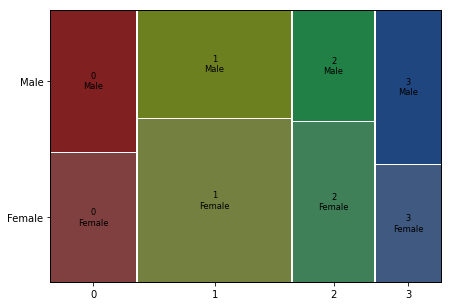

In [47]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
plt.show()

<AxesSubplot:xlabel='cluster_num', ylabel='Age'>

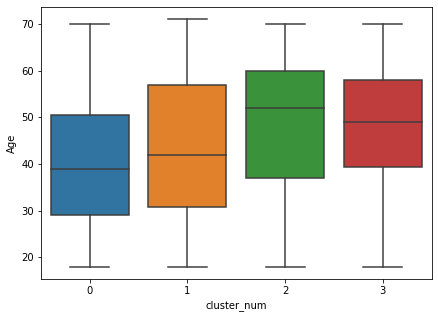

In [48]:
#box plot for age

sns.boxplot(x="cluster_num", y="Age", data=df)

In [49]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,2
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,1
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,2


# Selecting the target

In [50]:
#Calculating the mean
#Visit frequency
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [51]:
#Like
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.275542
1,1,2.962069
2,2,6.171053
3,3,7.422764


In [52]:
#Gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


In [53]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.523220,3.275542,2.547988
1,1,0.398276,2.962069,2.584483
2,2,0.411184,6.171053,2.822368
3,3,0.569106,7.422764,2.654472


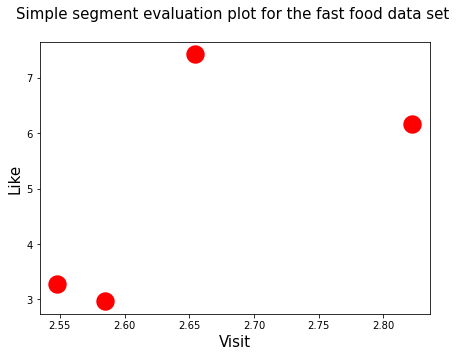

In [54]:
#Target segments

plt.rcParams['figure.figsize'] = (7,5)
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set \n",fontsize = 15) 
plt.xlabel("Visit", fontsize = 15) 
plt.ylabel("Like", fontsize = 15) 
plt.show()